# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 621


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}q={city}&appid={weather_api_key}&units=imperial'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, Cloudiness, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kodiak
Processing Record 2 of Set 1 | georgetown
Processing Record 3 of Set 1 | geraldton
Processing Record 4 of Set 1 | mahebourg
Processing Record 5 of Set 1 | lompoc
Processing Record 6 of Set 1 | tahoua
Processing Record 7 of Set 1 | hobart
Processing Record 8 of Set 1 | tuktoyaktuk
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | sakaraha
Processing Record 13 of Set 1 | umm kaddadah
Processing Record 14 of Set 1 | lebu
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | jalu
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | coquimbo
Processing Record 21 of Set 1 | pervomayskoye
Processing Record 22 of Set 1 | bluff
Processing Record 23 of

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(data=city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kodiak,57.7900,-152.4072,33.31,100,100,5.75,US,1673890046
1,georgetown,5.4112,100.3354,82.33,85,20,8.05,MY,1673890392
2,geraldton,-28.7667,114.6000,64.81,68,0,14.97,AU,1673890488
3,mahebourg,-20.4081,57.7000,79.25,73,75,14.97,MU,1673890488
4,lompoc,34.6391,-120.4579,52.79,94,100,12.66,US,1673890454


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("Output/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("Output/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kodiak,57.7900,-152.4072,33.31,100,100,5.75,US,1673890046
1,georgetown,5.4112,100.3354,82.33,85,20,8.05,MY,1673890392
2,geraldton,-28.7667,114.6000,64.81,68,0,14.97,AU,1673890488
3,mahebourg,-20.4081,57.7000,79.25,73,75,14.97,MU,1673890488
4,lompoc,34.6391,-120.4579,52.79,94,100,12.66,US,1673890454


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

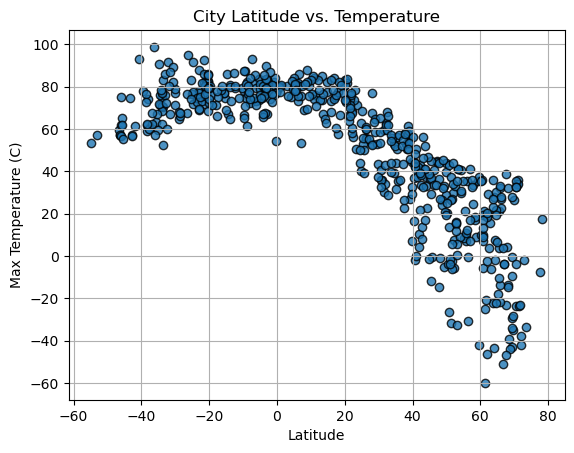

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors='black', alpha=.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Temperature")
plt.grid(True)

# Save the figure
plt.savefig("Output/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

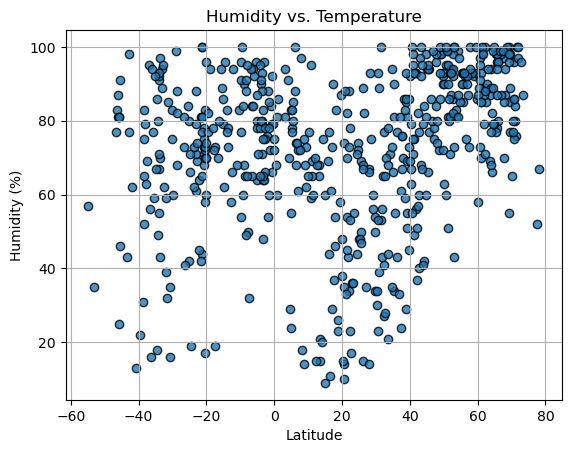

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors='black', alpha=.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Humidity vs. Temperature")
plt.grid(True)

# Save the figure
plt.savefig("Output/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

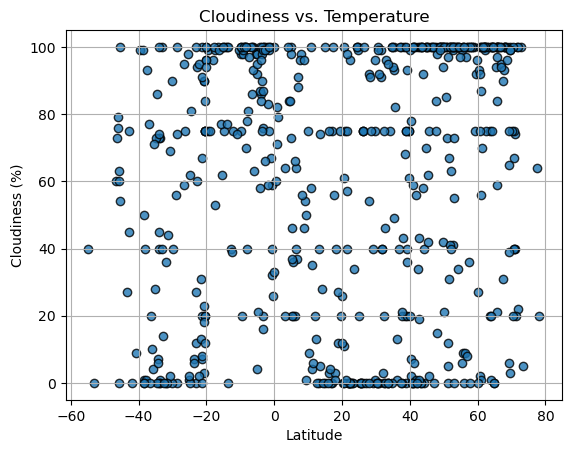

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors='black', alpha=.8)


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Cloudiness vs. Temperature")
plt.grid(True)

# Save the figure
plt.savefig("Output/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

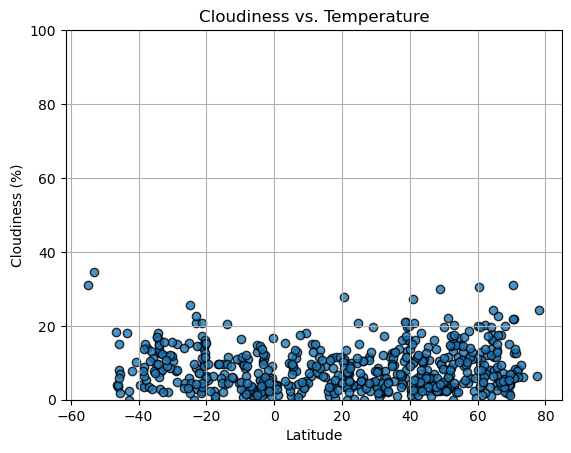

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors='black', alpha=.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Cloudiness vs. Temperature")
plt.grid(True)
plt.ylim(0,100,20)

# Save the figure
plt.savefig("Output/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def regress_plot(x,y):
    x_values = x
    y_values = y
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kodiak,57.7900,-152.4072,33.31,100,100,5.75,US,1673890046
1,georgetown,5.4112,100.3354,82.33,85,20,8.05,MY,1673890392
4,lompoc,34.6391,-120.4579,52.79,94,100,12.66,US,1673890454
5,tahoua,14.8888,5.2692,82.38,9,0,9.22,NE,1673890489
7,tuktoyaktuk,69.4541,-133.0374,-9.40,77,100,4.61,CA,1673890490


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,geraldton,-28.7667,114.6000,64.81,68,0,14.97,AU,1673890488
3,mahebourg,-20.4081,57.7000,79.25,73,75,14.97,MU,1673890488
6,hobart,-42.8794,147.3294,57.06,77,75,0.00,AU,1673890205
8,mataura,-46.1927,168.8643,57.31,81,76,3.49,NZ,1673890490
9,vaini,-21.2000,-175.2000,77.16,100,20,2.30,TO,1673890491


###  Temperature vs. Latitude Linear Regression Plot

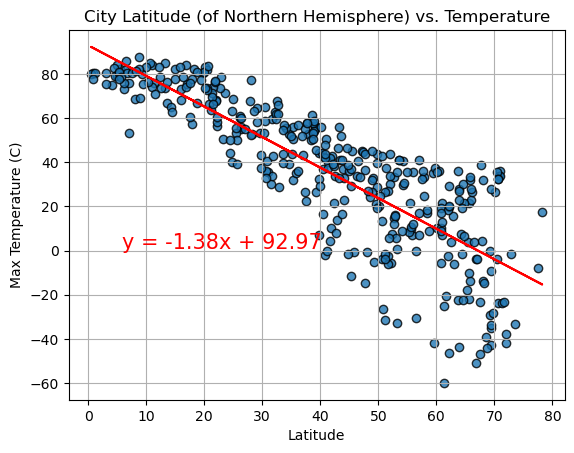

<function matplotlib.pyplot.clf()>

In [15]:
# Linear regression on Northern Hemisphere

# Use defined linear regression function
regress_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

# Plot the northern hemisphere values for latitude and temp
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], marker="o", edgecolors='black', alpha=.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude (of Northern Hemisphere) vs. Temperature")
plt.grid(True)

# Save the figure
plt.savefig("Output/Fig5.png")

# Show plot
plt.show()
plt.clf

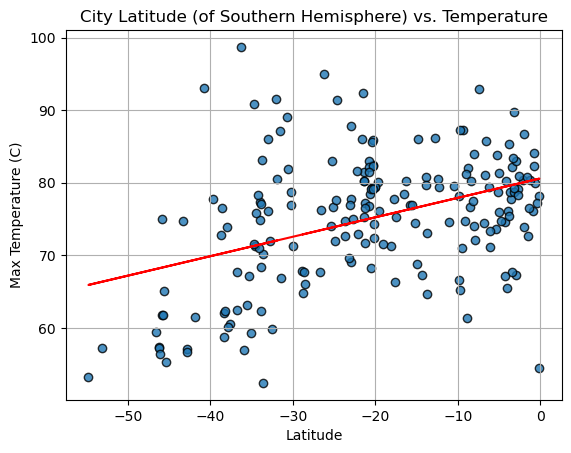

In [16]:
# Linear regression on Southern Hemisphere
# Use defined linear regression function
regress_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

# Plot the southern hemisphere values for latitude and temp
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], marker="o", edgecolors='black', alpha=.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude (of Southern Hemisphere) vs. Temperature")
plt.grid(True)

# Save the figure
plt.savefig("Output/Fig6.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

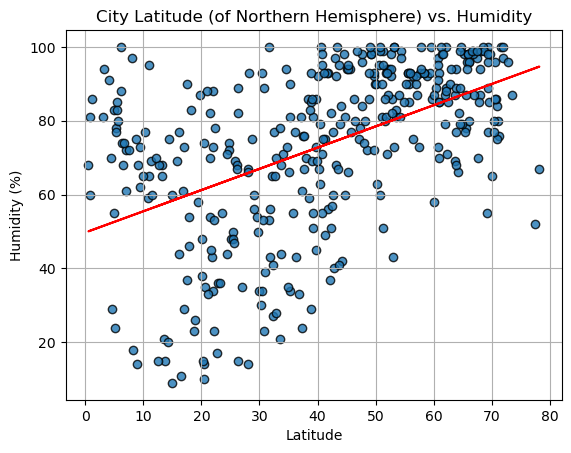

In [17]:
# Northern Hemisphere
# Use defined linear regression function
regress_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

# Plot the northern hemisphere values for latitude and temp
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], marker="o", edgecolors='black', alpha=.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude (of Northern Hemisphere) vs. Humidity")
plt.grid(True)

# Save the figure
plt.savefig("Output/Fig7.png")

# Show plot
plt.show()

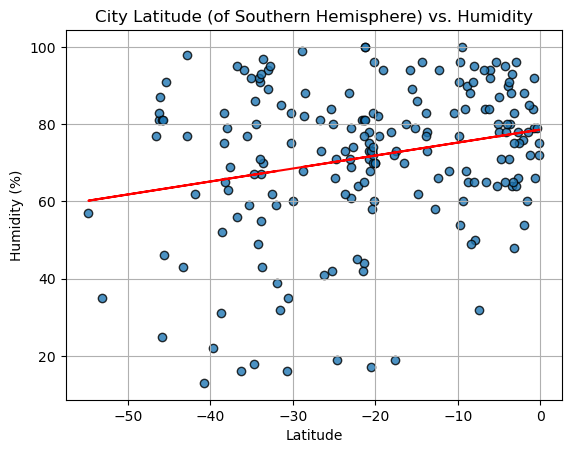

In [18]:
# Southern Hemisphere
# Use defined linear regression function
regress_plot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

# Plot the northern hemisphere values for latitude and temp
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], marker="o", edgecolors='black', alpha=.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude (of Southern Hemisphere) vs. Humidity")
plt.grid(True)

# Save the figure
plt.savefig("Output/Fig8.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

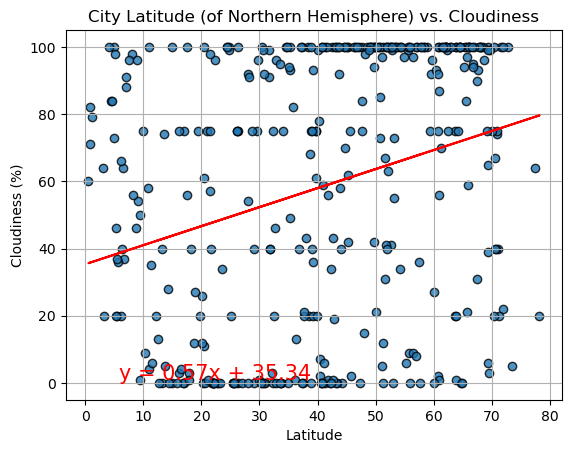

In [19]:
# Northern Hemisphere
# Use defined linear regression function
regress_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

# Plot the northern hemisphere values for latitude and temp
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], marker="o", edgecolors='black', alpha=.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude (of Northern Hemisphere) vs. Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("Output/Fig9.png")

# Show plot
plt.show()

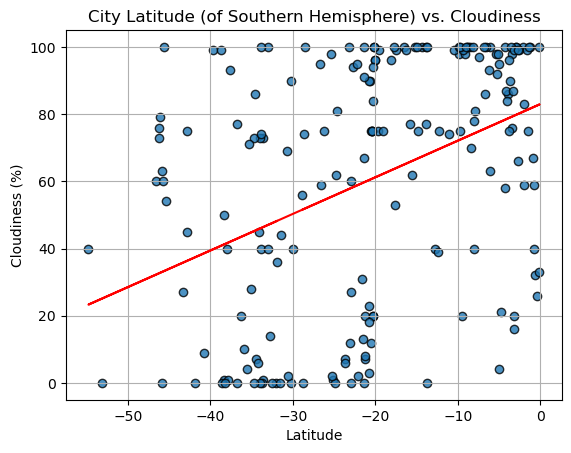

In [20]:
# Southern Hemisphere
# Use defined linear regression function
regress_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

# Plot the northern hemisphere values for latitude and temp
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], marker="o", edgecolors='black', alpha=.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude (of Southern Hemisphere) vs. Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("Output/Fig10.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

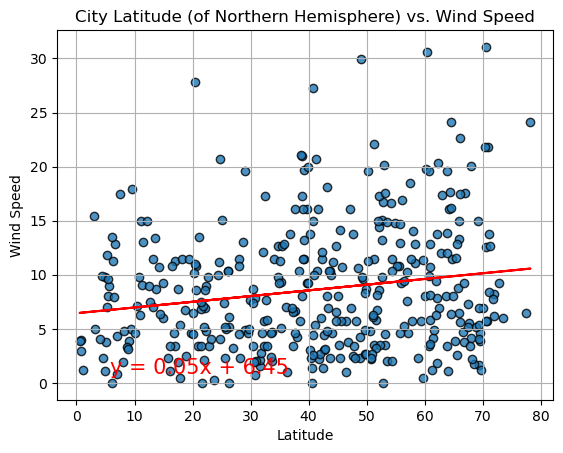

In [21]:
# Northern Hemisphere
# Use defined linear regression function
regress_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

# Plot the northern hemisphere values for latitude and temp
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], marker="o", edgecolors='black', alpha=.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude (of Northern Hemisphere) vs. Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("Output/Fig11.png")

# Show plot
plt.show()

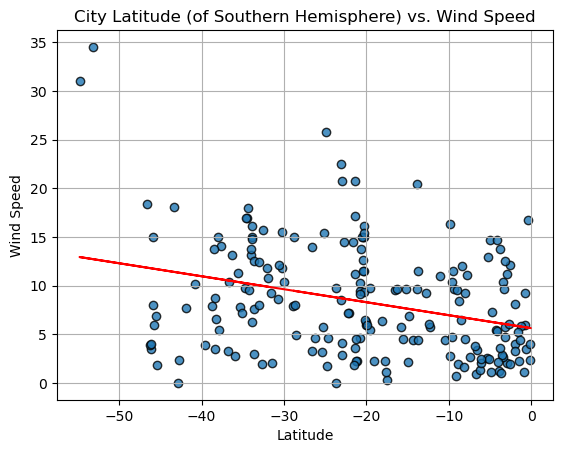

In [22]:
# Southern Hemisphere
# Use defined linear regression function
regress_plot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

# Plot the northern hemisphere values for latitude and temp
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], marker="o", edgecolors='black', alpha=.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude (of Southern Hemisphere) vs. Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("Output/Fig12.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# There appears to be a much stronger linear relationship between latitude and cloudiness than between latitude and wind speed. In both the northern and southern hemispheres,
# cities at higher latitudes can be expected to be cloudier on average. However, in regards to wind speed, cities in the northern hemisphere can be expected to have slightly
# higher wind speeds at higher latitudes while cities in the southern hemisphere can be expected to have slightly lower wind speeds at higher latitudes. 